## Imports

In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, SGDRegressor, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
import seaborn as sns

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


## Data import and preparation

### Reading the data

In [2]:
red_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', delimiter=';')

In [3]:
white_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', delimiter=';')

In [4]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
red_wine.columns.all() == white_wine.columns.all()

True

The initial data for both datasets has the same set of initial features, suggesting that both subsets could be easily combined into a single dataset.

Checking for duplicates:

In [7]:
red_wine.duplicated().sum()

240

In [8]:
red_wine.drop_duplicates(inplace=True, ignore_index=True)

In [9]:
red_wine.duplicated().sum()

0

In [10]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 127.5 KB


For the white wine set:

In [11]:
white_wine.duplicated().sum()

937

In [12]:
white_wine.drop_duplicates(inplace=True, ignore_index=True)

In [13]:
white_wine.duplicated().sum()

0

In [14]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3961 entries, 0 to 3960
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3961 non-null   float64
 1   volatile acidity      3961 non-null   float64
 2   citric acid           3961 non-null   float64
 3   residual sugar        3961 non-null   float64
 4   chlorides             3961 non-null   float64
 5   free sulfur dioxide   3961 non-null   float64
 6   total sulfur dioxide  3961 non-null   float64
 7   density               3961 non-null   float64
 8   pH                    3961 non-null   float64
 9   sulphates             3961 non-null   float64
 10  alcohol               3961 non-null   float64
 11  quality               3961 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 371.5 KB


In [15]:
red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [16]:
white_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000
mean,6.839346,0.280538,0.334332,5.914819,0.045905,34.889169,137.193512,0.993790,3.195458,0.490351,10.589358,5.854835
std,0.866860,0.103437,0.122446,4.861646,0.023103,17.210021,43.129065,0.002905,0.151546,0.113523,1.217076,0.890683
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991620,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000,6.000000
75%,7.300000,0.330000,0.390000,8.900000,0.050000,45.000000,166.000000,0.995710,3.290000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


On the other hand, mean values of some of the features, such as volatile acidity, residual sugar, clorides, sulfur dioxide contents, deviate significantly for the two subsets and might pose a problem if it is treated as a single dataset. There joined data would also be skewed with respect to the red wine samples, as there are three times as many white wine samples as there are the red ones.

In conclusion, we need to try modeling the data both separately and together and determine the better model. On the other hand, the final decision should be made after visual exploratory analysis.

The datasets do not have missing points, so we are lucky here.

All attributes are numerical and there are no categorical features to deal with.

### Joining the sets

For the joined data there is going to be one additional feature which may significantly influence the quaility assessment (target): wine type (red or white). To be able to stratify the data for validation set and possibly account it in the model, creating a lable for the type of the wine.

In [17]:
red_joint = red_wine.copy()
red_joint['type'] = 0

In [18]:
white_joint = white_wine.copy()
white_joint['type'] = 1

In [19]:
red_joint.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0


In [20]:
all_wine = pd.concat((red_joint, white_joint), ignore_index=True)
all_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0


In [21]:
all_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,7.215179,0.344130,0.318494,5.048477,0.056690,30.036654,114.109023,0.994535,3.224664,0.533357,10.549241,5.795677,0.744549
std,1.319671,0.168248,0.147157,4.500180,0.036863,17.805045,56.774223,0.002966,0.160379,0.149743,1.185933,0.879772,0.436155
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000,6.000000,1.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,3.330000,0.600000,11.400000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [22]:
all_wine.duplicated().sum()

0

In [23]:
all_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5320 entries, 0 to 5319
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5320 non-null   float64
 1   volatile acidity      5320 non-null   float64
 2   citric acid           5320 non-null   float64
 3   residual sugar        5320 non-null   float64
 4   chlorides             5320 non-null   float64
 5   free sulfur dioxide   5320 non-null   float64
 6   total sulfur dioxide  5320 non-null   float64
 7   density               5320 non-null   float64
 8   pH                    5320 non-null   float64
 9   sulphates             5320 non-null   float64
 10  alcohol               5320 non-null   float64
 11  quality               5320 non-null   int64  
 12  type                  5320 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 540.4 KB


Everything seems nice here.

### Visual exploration

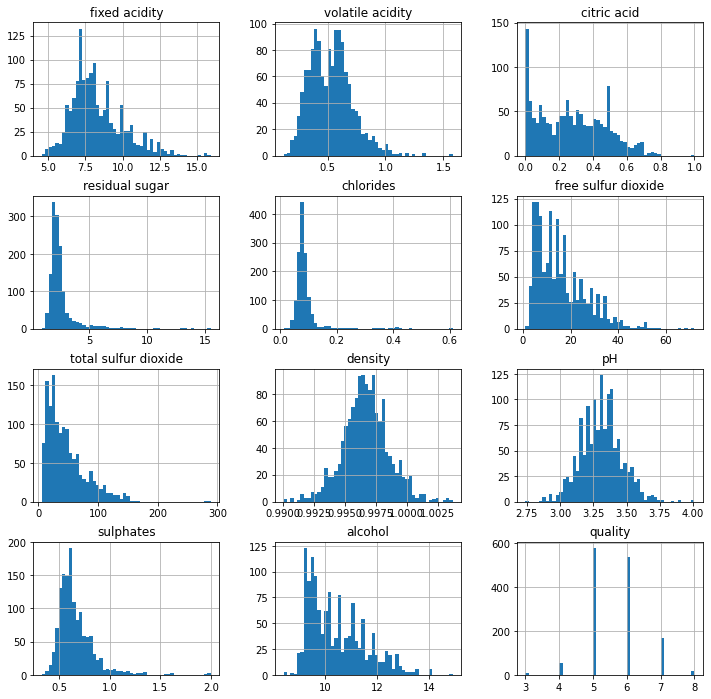

In [24]:
red_wine.hist(bins=50, figsize=(12, 12))
plt.show()

1. `quality` could be treated as categorical. As it our target here and we are doing linear regression, we are treating it as continuous.
2. `sugar` and `chlorides` have many outliers

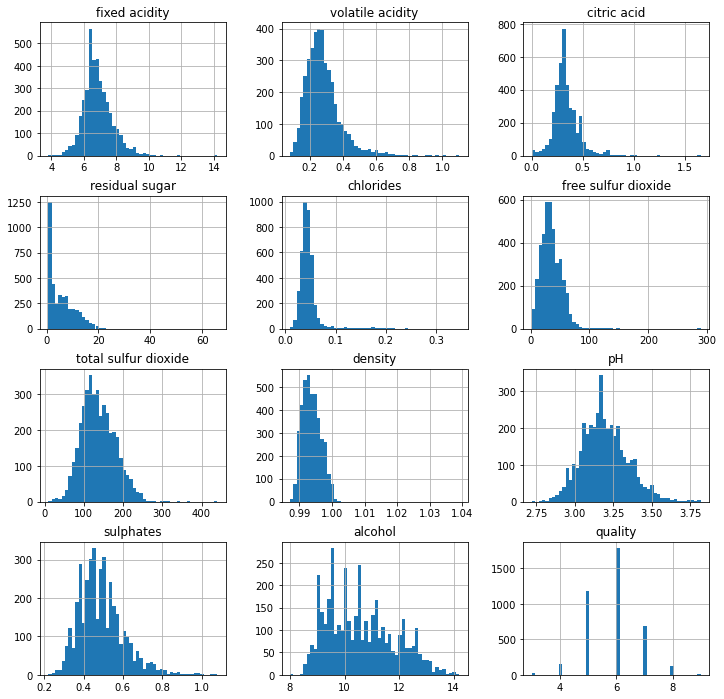

In [25]:
white_wine.hist(bins=50, figsize=(12, 12))
plt.show()

- Most data deviates from normal distribution and are skewed to the right (tail-heavy)
- Attributes have very different scales

The data will require preprocessing with scalers. Considering the right tails for many features, **standardization** is the way to go here. 

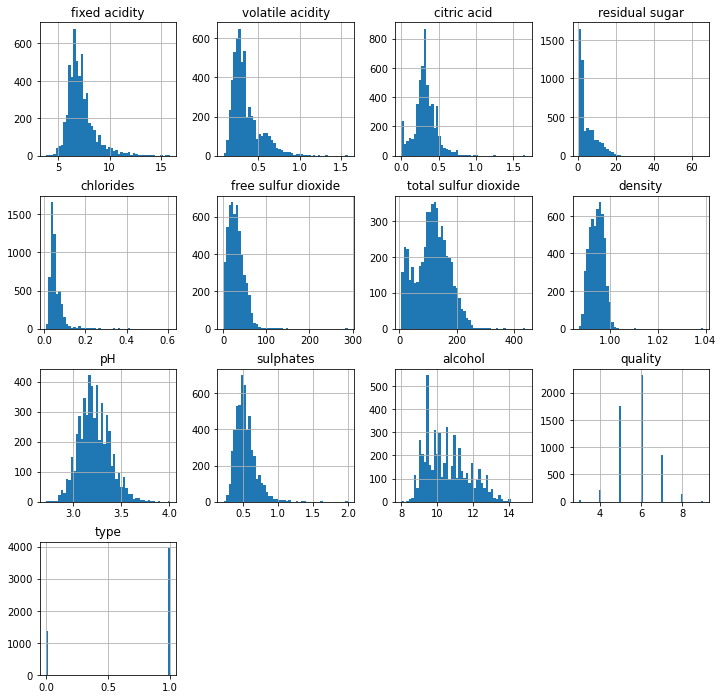

In [26]:
all_wine.hist(bins=50, figsize=(12, 12))
plt.show()

The two subsets seem complementary for some features, making their distributions more normal. But general picture is similar here.

## Creating train and test sets

To avoid data snooping bias (highly doubt I could have it at this stage, but just for the good practice), creating the test sets now.

In [27]:
train_red, test_red = train_test_split(red_wine, test_size=0.2)
train_white, test_white = train_test_split(white_wine, test_size=0.2)
train_all, test_all = train_test_split(all_wine, test_size=0.2, stratify=all_wine.type)

In [28]:
test_all.type.value_counts()

1    792
0    272
Name: type, dtype: int64

The split for the all_wine dataset seems good, as the ratio of red and white samples is similar to the ratio of samples in the original datasets.

## Exploring features

A reasonable approach here would be to look at the whole dataset and then check if the important relations are true for the subsets.

As we are dealing with linear regression here, Pearson's coeffitients should show us what is more relevant straight away.

In [29]:
all_corrs = all_wine.corr()

In [30]:
all_corrs.quality.sort_values(ascending=False)

quality                 1.000000
alcohol                 0.469422
type                    0.114809
citric acid             0.097954
free sulfur dioxide     0.054002
sulphates               0.041884
pH                      0.039733
total sulfur dioxide   -0.050296
residual sugar         -0.056830
fixed acidity          -0.080092
chlorides              -0.202137
volatile acidity       -0.265205
density                -0.326434
Name: quality, dtype: float64

There are no clear winners, though `alcohol` takes its rightful throne. Or just a chair, if the `density` is high.
People also do not like wine that smells like ~~piss~~ acid (`volatile acidity`), or tastes salty (`chlorides`). 

All make absolute sense without any model, for a human that is.

Importantly, `type` is there at the top. So, either the tasters were not impartial, or it has to be accounted for. 

All importants:

In [31]:
feats = ['quality','alcohol', 'type', 'density', 'volatile acidity', 'chlorides'] #as opposet to features or featuretes

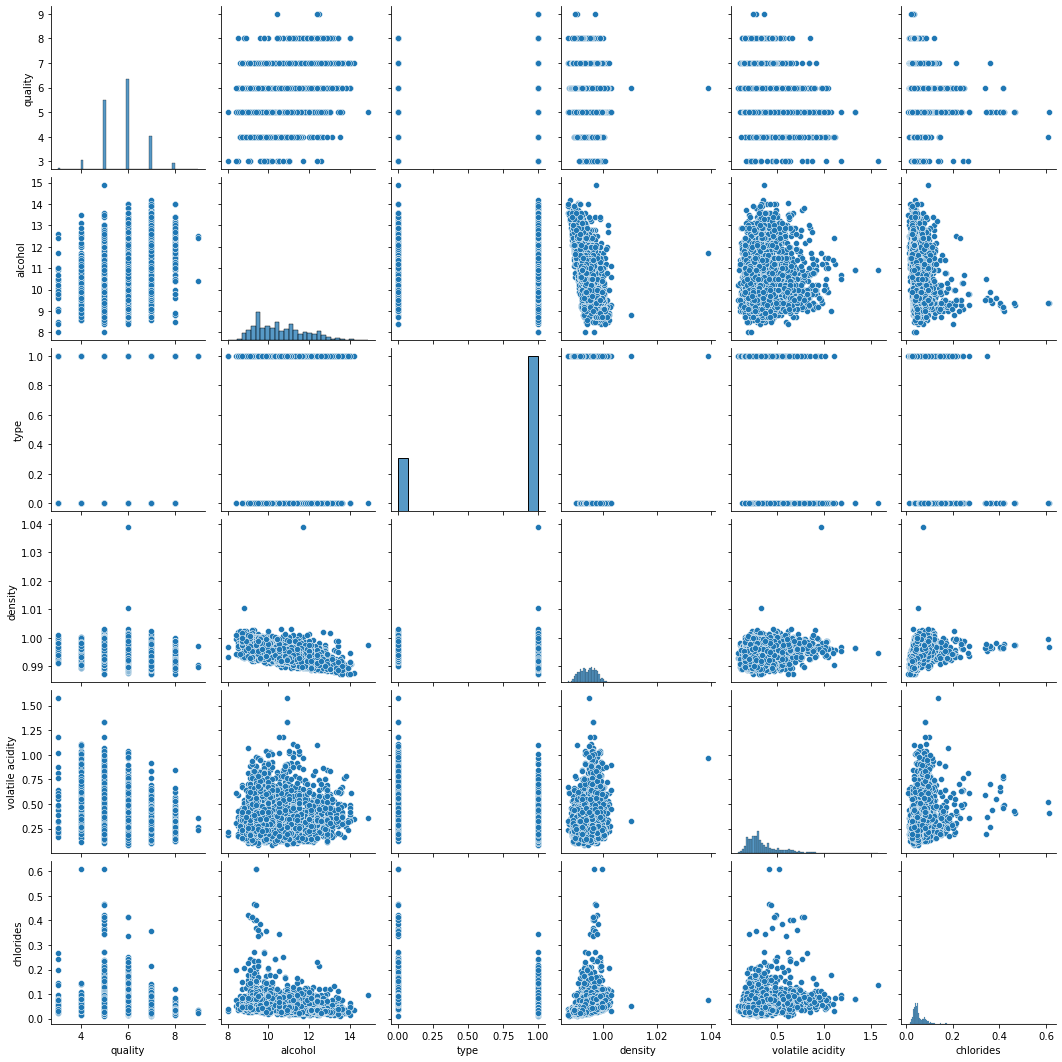

In [32]:
sns.pairplot(train_all[feats])

From this first look the most influential features for the quality are also mostly independent of each other. Taking a look numerically, as there may be something for alcohol and density.

In [33]:
train_all[feats].corr()

,quality,alcohol,type,density,volatile acidity,chlorides
quality,1.000000,0.466404,0.116505,-0.325772,-0.267451,-0.199021
alcohol,0.466404,1.000000,0.054872,-0.660915,-0.059212,-0.264606
type,0.116505,0.054872,1.000000,-0.423898,-0.643393,-0.493566
density,-0.325772,-0.660915,-0.423898,1.000000,0.306005,0.362188
volatile acidity,-0.267451,-0.059212,-0.643393,0.306005,1.000000,0.359872
chlorides,-0.199021,-0.264606,-0.493566,0.362188,0.359872,1.000000


`alcohol` and `density` are fairly strongly correlated, so something like alcohol point per density point could make sense. Trying it on s copy.

In [34]:
expt_all = train_all.copy()

In [35]:
expt_all['alc_per_dens'] = expt_all['alcohol']/expt_all['density']

In [36]:
expt_all.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alc_per_dens            0.466872
alcohol                 0.466404
type                    0.116505
citric acid             0.093266
free sulfur dioxide     0.060695
sulphates               0.042047
pH                      0.036903
total sulfur dioxide   -0.048118
residual sugar         -0.051479
fixed acidity          -0.085265
chlorides              -0.199021
volatile acidity       -0.267451
density                -0.325772
Name: quality, dtype: float64

Sure, its correlation with quality is even a little more strong.

## Building a pipeline

The pipeline here is goinig to have only two preparatory steps: adding features and applying a scaler. It should also contain some cleaning steps, but our data do not require much, except duplicates removel. It was done manually.

For the feature addition step we need to write a custom transformer, though.

In [40]:
class FeatureCombiner(BaseEstimator, TransformerMixin):
    def __init__(self, add_alcohol_density_ratio=True):
        self.add_alcohol_density_ratio = add_alcohol_density_ratio

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if self.add_alcohol_density_ratio:
            #alc_per_dens = X['alcohol'] / X['density']
            alc_per_dens = X[:, 10] / X[:, 7]
            return np.c_[X, alc_per_dens]
        else:
            return X


In [58]:
def pipe(model):
    return Pipeline([
    ('feat_adder', FeatureCombiner()),
    ('std_scaler', StandardScaler()),
    ('model', model)
])

In [59]:
linreg_pipe = pipe(LinearRegression())

## Training

In [92]:
def get_cv_rmse(model, X, y, scoring='neg_mean_squared_error', cv=10, show=True):
    scores = cross_val_score(model, X, y, scoring=scoring, cv=cv)
    rmses = np.sqrt(-scores)
    if show:
        print(f'RMSE for each split: {rmses}\n Mean RMSE: {rmses.mean()}\n Std: {rmses.std()}')
    return rmses
  

### Base model

In [49]:
X_tr_all = train_all.drop('quality', axis=1).values
y_tr_all = train_all.quality.copy().values

In [60]:
linreg_pipe.fit(X_tr_all, y_tr_all)

Pipeline(steps=[('feat_adder', FeatureCombiner()),
                ('std_scaler', StandardScaler()),
                ('model', LinearRegression())])

In [61]:
linreg_pipe.score(X_tr_all, y_tr_all)

0.31203955910715786

R^2 is really low suggesting poor description of the data by a linear model. 

Looking at the performance:

In [93]:
get_cv_rmse(linreg_pipe, X_tr_all, y_tr_all)

RMSE for each split: [0.65943123 0.72757488 0.7375199  0.73598111 0.75700078 0.77842682
 0.67442432 0.78538256 0.76300206 0.77763279]
 Mean RMSE: 0.7396376438902872
 Std: 0.04091138461518901


array([0.65943123, 0.72757488, 0.7375199 , 0.73598111, 0.75700078,
       0.77842682, 0.67442432, 0.78538256, 0.76300206, 0.77763279])

RMSEs *suggest* that even with this model we should be able to get within 1 quality point with this model.

Making some predictions and looking at them suggests the same:

In [100]:
linreg_pipe.predict(X_tr_all[100:105])

array([5.582686  , 5.50730838, 5.23001249, 5.25242998, 6.53062811])

In [101]:
y_tr_all[100:105]

array([6, 6, 5, 5, 7], dtype=int64)

There is basically a single hyperparameter for this model to optimize, which is comming from the first step of the pipeline. Still, lets try.

In [103]:
linreg_pars = {'feat_adder__add_alcohol_density_ratio':[True, False]}

linreg_gs = GridSearchCV(linreg_pipe, linreg_pars, cv=10)
linreg_gs.fit(X_tr_all, y_tr_all)
linreg_gs.best_score_


0.30068245096510204

In [113]:
pd.DataFrame(linreg_gs.cv_results_)[['param_feat_adder__add_alcohol_density_ratio', 'mean_test_score',	'std_test_score',	'rank_test_score']]


,param_feat_adder__add_alcohol_density_ratio,mean_test_score,std_test_score,rank_test_score
0,True,0.300462,0.054298,2
1,False,0.300682,0.054360,1


So, the model is better without the added feature, but only marginally.

NOTE, that the score is *worse* after the cross-validation, than it was on the whole data.

#### Attempts on separate datasets.

##### Red wine

In [78]:
X_tr_red = train_red.drop('quality', axis=1).values
y_tr_red = train_red.quality.copy().values

In [79]:
linreg_red = pipe(LinearRegression())
linreg_red.fit(X_tr_red, y_tr_red)
linreg_red.score(X_tr_red, y_tr_red)

0.3593556382086964

In [115]:
get_cv_rmse(linreg_red, X_tr_red, y_tr_red)

RMSE for each split: [0.60916586 0.59536626 0.65434651 0.76910615 0.70837358 0.60943732
 0.66637171 0.71353051 0.65260644 0.64507568]
 Mean RMSE: 0.6623380025375212
 Std: 0.05169447041324337


array([0.60916586, 0.59536626, 0.65434651, 0.76910615, 0.70837358,
       0.60943732, 0.66637171, 0.71353051, 0.65260644, 0.64507568])

Here the score (before CV) is somewhat better, suggesting better linearity of the data. Same goes for the performance wrt errors, they are slightly better. But not so much as to justify splitting the model in two.

##### White wine

In [116]:
X_tr_white = train_white.drop('quality', axis=1).values
y_tr_white = train_white.quality.copy().values

In [117]:
linreg_white = pipe(LinearRegression())
linreg_white.fit(X_tr_white, y_tr_white)
linreg_white.score(X_tr_white, y_tr_white)

0.3126292799980347

In [118]:
get_cv_rmse(linreg_white, X_tr_white, y_tr_white)

RMSE for each split: [0.66791301 0.73668639 0.74761207 0.7261902  0.74923379 0.77046555
 0.86585913 0.74216404 0.71002097 0.78146738]
 Mean RMSE: 0.7497612530178036
 Std: 0.048969633721796274


array([0.66791301, 0.73668639, 0.74761207, 0.7261902 , 0.74923379,
       0.77046555, 0.86585913, 0.74216404, 0.71002097, 0.78146738])

For the white subset, which constitutes the majority of the joined set, the performance is virtually the same as that for the joined data.

*There does not seem to be any significant advantage in treating the red and white wine data separately. **Further work is done on the joined dataset.***

### Trying different models

#### Ridge (l2 regularized LR)

In [120]:
ridge_pipe = pipe(Ridge())

In [121]:
ridge_pipe.fit(X_tr_all, y_tr_all)

Pipeline(steps=[('feat_adder', FeatureCombiner()),
                ('std_scaler', StandardScaler()), ('model', Ridge())])

In [122]:
ridge_pipe.score(X_tr_all, y_tr_all)

0.311820534633777

Single-run score without hyperparameter tuning looks the same as for the regular LinearRegression.

In [130]:
ridge_pars = {'feat_adder__add_alcohol_density_ratio':[True, False],
              'model__alpha': np.logspace(-3, 1, 10)}
ridge_gs = GridSearchCV(ridge_pipe, ridge_pars, cv=10)
ridge_gs.fit(X_tr_all, y_tr_all)
ridge_gs.best_score_

0.30119023839317655

In [133]:
pd.DataFrame(ridge_gs.cv_results_)[['param_feat_adder__add_alcohol_density_ratio', 'param_model__alpha', 'mean_test_score',	'std_test_score',	'rank_test_score']]

,param_feat_adder__add_alcohol_density_ratio,param_model__alpha,mean_test_score,std_test_score,rank_test_score
0,True,0.001,0.300491,0.054301,20
1,True,0.002783,0.300532,0.054306,19
2,True,0.007743,0.300598,0.054315,18
3,True,0.021544,0.300662,0.054327,17
4,True,0.059948,0.300693,0.054333,10
5,True,0.16681,0.300706,0.054329,9
6,True,0.464159,0.300725,0.054304,7
7,True,1.29155,0.300774,0.054232,5
8,True,3.593814,0.300901,0.054040,3
9,True,10.0,0.301190,0.053583,1


In [134]:
ridge = ridge_gs.best_estimator_

get_cv_rmse(ridge, X_tr_all, y_tr_all)

RMSE for each split: [0.6596872  0.7270636  0.73826208 0.73632079 0.75687637 0.77387229
 0.67450092 0.78419501 0.76375949 0.77798609]
 Mean RMSE: 0.7392523836077959
 Std: 0.040387365529560355


array([0.6596872 , 0.7270636 , 0.73826208, 0.73632079, 0.75687637,
       0.77387229, 0.67450092, 0.78419501, 0.76375949, 0.77798609])

More or less the same situation after the cross-validation and HP tuning as for the regular LinearRegression model.

##### LASSO

Using LassoCV here, as it automates cros-validation, hyperparams tuning and feature selection in one simple package.

In [136]:
lcv_pipe = pipe(LassoCV())

In [137]:
lcv_pipe.fit(X_tr_all, y_tr_all)
lcv_pipe.score(X_tr_all, y_tr_all)

0.31128184851551466

In [138]:
get_cv_rmse(lcv_pipe, X_tr_all, y_tr_all)

RMSE for each split: [0.6589623  0.72746104 0.73907626 0.73875942 0.75725265 0.77556477
 0.67619948 0.78464646 0.7650841  0.77849999]
 Mean RMSE: 0.7401506476830437
 Std: 0.04057620171036562


array([0.6589623 , 0.72746104, 0.73907626, 0.73875942, 0.75725265,
       0.77556477, 0.67619948, 0.78464646, 0.7650841 , 0.77849999])

Same story as for others.

#### SGD

In [139]:
sgd_pipe = pipe(SGDRegressor())
sgd_pipe.fit(X_tr_all, y_tr_all)
sgd_pipe.score(X_tr_all, y_tr_all)

0.30982561289989863

The score is practically the same, even a little worse, on the cold run. Hyperparameters for this model basically include those from the others tried above, and it is hard to expect something better here. 

**Conclusiton for all models**

The low values of R^2 for all the model shows that the data may not be linear, and we need more complex models to find the best fit.

## Validation

The best score was achieved with Lasso model, so setting it as the final for validation:

In [140]:
fin_model = lcv_pipe

In [141]:
X_test_all = test_all.drop('quality', axis=1).values
y_test_all = test_all.quality.copy().values

In [142]:
test_preds = fin_model.predict(X_test_all)

In [146]:

fin_mse = mean_squared_error(y_test_all, test_preds)
fin_mse

0.5000458418156148

In [147]:
fin_rmse = np.sqrt(fin_mse)
fin_rmse

0.7071391955022822

In [151]:
y_test_all

array([6, 5, 6, ..., 7, 6, 5], dtype=int64)

In [162]:
test_preds.reshape(-1, 1)


(1064,)

In [166]:
np.concatenate((y_test_all.reshape(-1, 1), test_preds.reshape(-1, 1)), axis=1)

array([[6.        , 5.09090315],
       [5.        , 5.47502092],
       [6.        , 5.47805217],
       ...,
       [7.        , 6.39133384],
       [6.        , 6.34076373],
       [5.        , 5.4755368 ]])

## Conclusions

- all linear models show low scores (R^2 score) on the dataset, suggesting that the linear models are not the best choice for the data;
- all models show very close performance, with Lasso having a slightly better overall R^2 score after optimization;
- this model gives RMSE = 0.7071 for the houldout dataset, suggesting that it can still predict the quality within 1 quality point of the scale (which is not bad, considering the subjective nature of the scoring, albeit averaged from several assessors).